# SpringBoot - Mybatis

> 마이바티스-스프링 연동 모듈로 간편하게 연동  
> 마이바티스가 `스프링 트랜잭션`에 쉽게 연동되도록 처리한다.
> `mapper`와 `sqlSession`을 다루고, 빈에 주입시켜준다.  

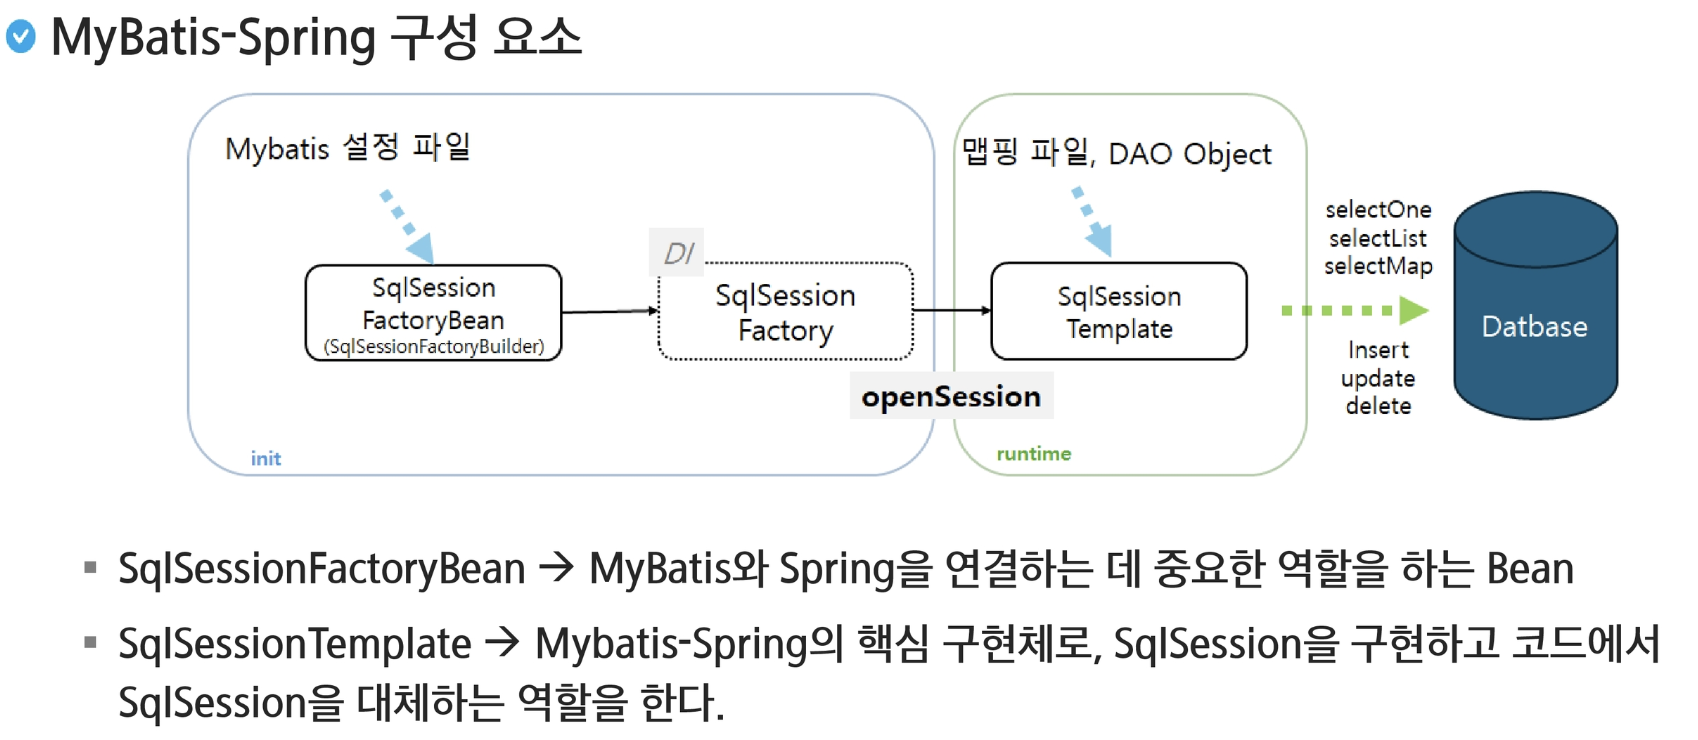

## MyBatis 사용하기

프로젝트 생성 시 설정

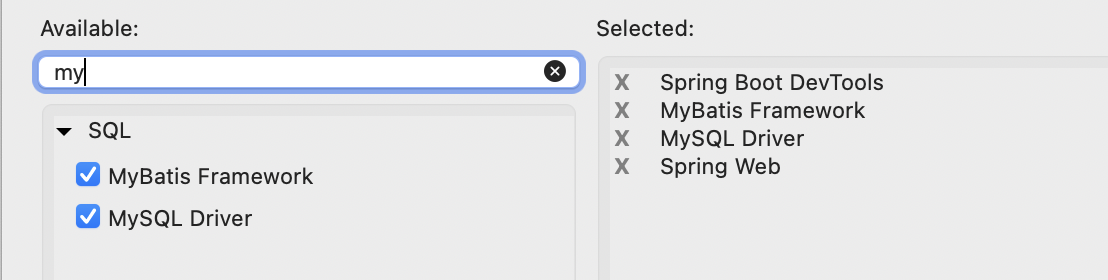


### `pom.xml`

```xml
<dependencies>
    <dependency>
        <groupId>org.springframework.boot</groupId>
        <artifactId>spring-boot-starter-web</artifactId>
    </dependency>
    
    <dependency>
        <groupId>org.mybatis.spring.boot</groupId>
        <artifactId>mybatis-spring-boot-starter</artifactId>
        <version>3.0.4</version>
    </dependency>

    <dependency>
        <groupId>org.springframework.boot</groupId>
        <artifactId>spring-boot-devtools</artifactId>
        <scope>runtime</scope>
        <optional>true</optional>
    </dependency>
    <dependency>
        <groupId>com.mysql</groupId>
        <artifactId>mysql-connector-j</artifactId>
        <scope>runtime</scope>
    </dependency>
    <dependency>
        <groupId>org.springframework.boot</groupId>
        <artifactId>spring-boot-starter-test</artifactId>
        <scope>test</scope>
    </dependency>
    <dependency>
        <groupId>org.mybatis.spring.boot</groupId>
        <artifactId>mybatis-spring-boot-starter-test</artifactId>
        <version>3.0.4</version>
        <scope>test</scope>
    </dependency>
    <dependency>
        <groupId>org.apache.tomcat.embed</groupId>
        <artifactId>tomcat-embed-jasper</artifactId>
    </dependency>
    <dependency>
        <groupId>jakarta.servlet.jsp.jstl</groupId>
        <artifactId>jakarta.servlet.jsp.jstl-api</artifactId>
    </dependency>
    <dependency>
        <groupId>org.glassfish.web</groupId>
        <artifactId>jakarta.servlet.jsp.jstl</artifactId>
    </dependency>
</dependencies>
```

### `application.properties`

```xml
spring.application.name=study_04_Bohyung
spring.mvc.view.prefix=/WEB-INF/views/
spring.mvc.view.suffix=.jsp

#dataSource
spring.datasource.driver-class-name=com.mysql.cj.jdbc.Driver
spring.datasource.url=jdbc:mysql://localhost:3306/ssafy?serverTimezone=UTC
spring.datasource.username=root
spring.datasource.password=root

# mybatis
mybatis.mapper-locations=classpath*:mappers/*.xml
mybatis.type-aliases-package=com.ssafy.study_04_bohyung.model.dto
mybatis.configuration.map-underscore-to-camel-case=true
```
- `dataSource`
    - `ssafy`부분은 `MySQL` 스키마 이름
    - `MySQL` 계정 정보를 등록해서 연결한다.
- `mybatis`
    - `클래스패스` - `mappers`폴더 내 모든 `xml`파일을 `mapper`로 등록
    - `type-aliases-package`를 등록하면 `__mapper.xml`에서 풀패키지명을 등록하지 않아도 된다.

### 매퍼 스캔

`DBConfig.java`파일에서 매퍼 스캔.
- 웹, 자바, DB등 설정을 파일로 구분해서 관리

    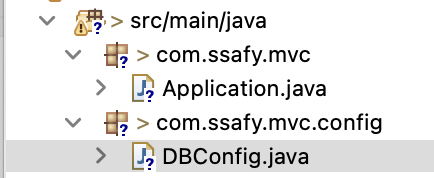
    
    ```java
    @Configuration
    @MapperScan(basePackages = "com.ssafy.mvc.model.dao")
    public class DBConfig {

    }
    ```
    - `@Configuration` 어노테이션으로 설정파일로 등록
    - `dao` 패키지에서 스캔

#### DAO

> Data Access Object  
> DB의 데이터에 접근하기 위한 객체.  
- DB의 연결 관리, SQL문 실행  
- 일반적으로 `인터페이스`로 처리되고, 이 인터페이스의 `구현체`에서 실제 DB 연결 및 데이터 처리 로직을 구현한다.  
- 데이터 로직 접근과 비즈니스 로직을 분리하여 코드의 유지보수성 높임

`DTO`는 단순히 데이터를 주고받기만 하기 때문에 인터페이스로 만들 필요가 없지만, `DAO`는 데이터 접근 방식이 바뀔 가능성이 있어서 인터페이스로 만든다.
- 예) MySQL에서 Oracle로 변경, `JDBC`에서 `JPA`로 변경

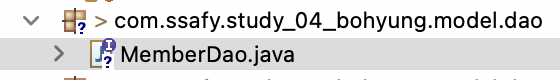
```java
import java.util.List;

import com.ssafy.study_04_bohyung.model.dto.Member;

public interface MemberDao {
	
	public List<Member> selectAll();
	
	public Member selectOne(int id);
	
	public void insertMember(Member member);
	
	public void deleteMember(int id);
	
}

```


#### `Service` 계층

> 요청을 처리하기 위한 비즈니스 로직을 수행
- DB와 연결이 필요하면 `Repository` 또는 `Mapper`를 호출한다.

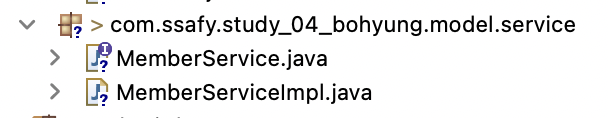

```java
import java.util.List;

import com.ssafy.study_04_bohyung.model.dto.Member;

public interface MemberService {
	public List<Member> getMemberList();
	
	public Member viewMember(int id);
	
	public void addMember(Member member);
	
	public void removeMember(int id);
}

```

```java
package com.ssafy.study_04_bohyung.model.service;

import java.util.List;

import org.springframework.stereotype.Service;

import com.ssafy.study_04_bohyung.model.dao.MemberDao;
import com.ssafy.study_04_bohyung.model.dto.Member;

@Service
public class MemberServiceImpl implements MemberService{
	
	private final MemberDao memberDao;
	
	public MemberServiceImpl(MemberDao memberDao) {
		this.memberDao = memberDao;
	}
	
	@Override
	public List<Member> getMemberList() {
		// TODO Auto-generated method stub
		return memberDao.selectAll();
	}

	@Override
	public Member viewMember(int id) {
		// TODO Auto-generated method stub
		return memberDao.selectOne(id);
	}

	@Override
	public void addMember(Member member) {
		// TODO Auto-generated method stub
		memberDao.insertMember(member);
	}

	@Override
	public void removeMember(int id) {
		// TODO Auto-generated method stub
		memberDao.deleteMember(id);
	}

}
```

- 서비스에서는 메서드 이름을 좀 더 유저친화적으로 만드는 경향이 있다.
- 반면 `DAO`에서는 `sql`식으로 메서드명을 짓는다.

### `Mapper.xml`

여기서는 서비스에서 호출한 메서드와 일치하는`id`의 sql문을 실행한다.

```xml
<?xml version="1.0" encoding="UTF-8" ?>
<!DOCTYPE mapper
  PUBLIC "-//mybatis.org//DTD Mapper 3.0//EN"
  "https://mybatis.org/dtd/mybatis-3-mapper.dtd">
<mapper namespace="com.ssafy.study_04_bohyung.model.dao.MemberDao">
	
  <resultMap type="com.ssafy.study_04_bohyung.model.dao.MemberDao" id="MemberMap">
  	<result column="title" property="title"></result>
  </resultMap>	
	
  <select id="selectAll" resultType="Member">
    select * from member1206
  </select>
  
  <select id="selectOne" resultType="com.ssafy.study_04_bohyung.model.dto.Member" parameterType="int">
    select * from member1206 where id = #{id}
  </select>
  
  <insert id="insertMember" parameterType="com.ssafy.study_04_bohyung.model.dto.Member">
  	insert into member1206 (name, jumin, age, phone)
  	values (#{name}, #{jumin}, #{age}, #{phone});
  </insert>
  
  <delete id="deleteMember" parameterType="int">
    DELETE FROM member1206
    WHERE id = #{id};
</delete>
</mapper>
```